# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [ ]:
import sympy as sp

# Function to calculate the derivative
def dy_dx(f):
    x = sp.symbols('x')
    derivative = sp.diff(f, x)
    return derivative

# Defining the function f(x)
x = sp.symbols('x')
f = x**4 - 4*x**3 + 6*x**2 - 2 # This is just an example!

# Finding the derivative of f(x)
result = dy_dx(f)

print("The derivative of f(x) is:", result)




The derivative of f(x) is: 4*x**3 - 12*x**2 + 12*x


# Task 2: Test the derivative function written with an equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [ ]:
# defining the function
def f(x):
  return x**6 - 15*x**4 + 27*x**2 + 10

x = sp.symbols('x')

# testing the derivative function
result = dy_dx(f(x))
print("The derivative of f(x) is:", result)

# finding critical points where derivative equals to 0
critical_points = sp.solve(result, x)
print("Critical points:", critical_points)

# finding the second derivative using the derivative function on the
# first derivative
second_derivative = dy_dx(result)
print("Second derivative:", second_derivative)

# finding the local maximum and local minimum
for point in critical_points:
  nature = sp.sign(second_derivative.subs(x, point))
  if nature > 0:
    print(f"x = {point} is a local minimum")
  elif nature < 0:
    print(f"x = {point} is a local maximum")



The derivative of f(x) is: 6*x**5 - 60*x**3 + 54*x
Critical points: [-3, -1, 0, 1, 3]
Second derivative: 30*x**4 - 180*x**2 + 54
x = -3 is a local minimum
x = -1 is a local maximum
x = 0 is a local minimum
x = 1 is a local maximum
x = 3 is a local minimum


#Task 3: Plot a graph of the Equation must have 4 points (2 minimas and 2 maximas)

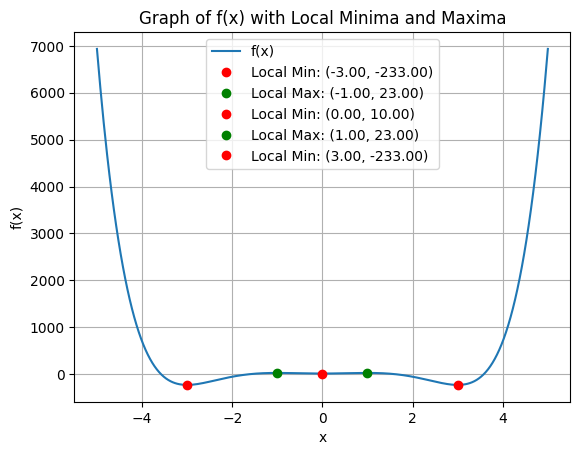

In [ ]:
#Create a visualization of the quadratic/algebraic equation

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x**6 - 15*x**4 + 27*x**2 + 10

# Define symbolic variable
x = sp.symbols('x')

# Reuse derivative and critical points from Task 2
derivative = dy_dx(f(x))  # Assuming dy_dx function from Task 1 is already available
critical_points = sp.solve(derivative, x)

# Reuse second derivative from Task 2
second_derivative = dy_dx(derivative)

# Convert symbolic function to numerical function
f_lambdified = sp.lambdify(x, f(x), 'numpy')
second_derivative_lambdified = sp.lambdify(x, second_derivative, 'numpy')

# Create points for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = f_lambdified(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label="f(x)")

# Plot critical points and classify as minima or maxima
for point in critical_points:
    point_val = float(point)
    y_critical = f_lambdified(point_val)
    second_derivative_at_point = second_derivative_lambdified(point_val)

    if second_derivative_at_point > 0:
        plt.plot(point_val, y_critical, 'ro', label=f"Local Min: ({point_val:.2f}, {y_critical:.2f})")
    elif second_derivative_at_point < 0:
        plt.plot(point_val, y_critical, 'go', label=f"Local Max: ({point_val:.2f}, {y_critical:.2f})")

# Labeling the plot
plt.title("Graph of f(x) with Local Minima and Maxima")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Task 4: Create separate array of Minimas and maximas

In [ ]:
arr_minimas = []
arr_maximas = []

for critical_point in critical_points:
  point_val = float(critical_point)
  y_critical = f_lambdified(point_val)
  dericative_2 = second_derivative_lambdified(point_val)

  if dericative_2 > 0:
    arr_minimas.append((point_val, y_critical))
  elif dericative_2 < 0:
    arr_maximas.append((point_val, y_critical))

print(f'the array of minimas {arr_minimas} and the array of maximas is {arr_maximas}')




the array of minimas [(-3.0, -233.0), (0.0, 10.0), (3.0, -233.0)] and the array of maximas is [(-1.0, 23.0), (1.0, 23.0)]


In [ ]:
Global_maxima = max(arr_maximas, key=lambda x: x[1]) #TO DO (make sure its the x,y axis

Global_minima = min(arr_minimas, key=lambda x: x[1]) #TO DO (make sure its the x,y axis
print(f'The global maxima is {Global_maxima}')

print(f'The global minima is {Global_minima}')

The global maxima is (-1.0, 23.0)
The global minima is (-3.0, -233.0)


# Task 5: Finding the Area under the curve

The area under the curve from -5 to 5 is: 41450/7


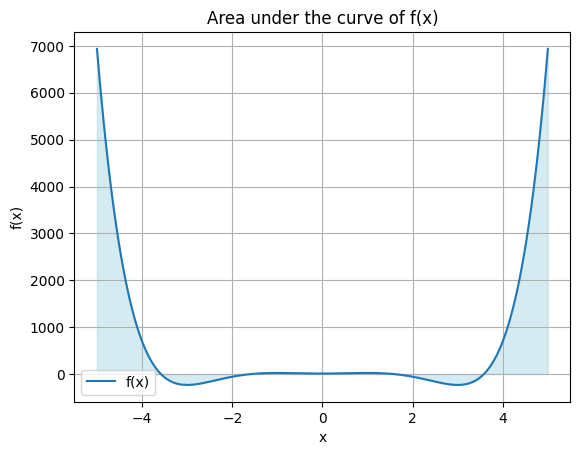

In [ ]:
#This is where you do integration
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**6 - 15*x**4 + 27*x**2 + 10

# Define the symbol
x = sp.symbols('x')

# Perform the definite integral from -5 to 5
area = sp.integrate(f(x), (x, -5, 5))
print(f"The area under the curve from -5 to 5 is: {area}")

# Plotting the function and shading the area under the curve
x_vals = np.linspace(-5, 5, 400)
f_lambdified = sp.lambdify(x, f(x), 'numpy')
y_vals = f_lambdified(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label="f(x)")

# Fill the area under the curve between the limits
plt.fill_between(x_vals, y_vals, where=[(x >= -5 and x <= 5) for x in x_vals], color='lightblue', alpha=0.5)

# Label the plot
plt.title("Area under the curve of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
